In [1]:
import matplotlib.pyplot as plt

## SVR

In [2]:
%%writefile ../scripts/svr.py
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import sys
import os

C = (0.1, 0.5, 1, 5, 10)
kernel = ('linear', 'rbf', 'sigmoid')
param_grid = {'C':C, 'kernel':kernel}
svr = SVR()
cvmodel = GridSearchCV(svr, param_grid, refit=True, cv=5)
model_name = sys.argv[0].split('/')[-1].replace('.py','')
path = sys.argv[1]
fold = sys.argv[2]
f_id = sys.argv[3]
trn_X = np.load(path+'data10/fold_'+fold+'/train/X/'+f_id+'.npz')['arr_0']
trn_y = np.load(path+'data10/fold_'+fold+'/train/y/'+f_id+'.npz')['arr_0']
tst_X = np.load(path+'data10/fold_'+fold+'/test/X/'+f_id+'.npz')['arr_0']
scaler = pd.read_pickle(path+'data10/fold_'+fold+'/scaler/'+f_id+'.pickle')

cvmodel.fit(trn_X, trn_y.ravel())
pred_y = scaler.inverse_transform(cvmodel.predict(tst_X))

if not os.path.exists(path+'data10/results/'+model_name+'/fold_'+fold+'/'):
    os.makedirs(path+'data10/results/'+model_name+'/fold_'+fold+'/')
np.savez_compressed(path+'data10/results/'+model_name+'/fold_'+fold+'/'+f_id+'.npz', pred_y)
pd.to_pickle(cvmodel, path+'data10/results/'+model_name+'/fold_'+fold+'/'+f_id+'.model')

Overwriting ../scripts/svr.py


### Random Forest

In [3]:
%%writefile ../scripts/rf.py
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
import sys
import os

param_grid = {'n_estimators':[100], 
              'max_depth':[1,2,3,4,20],
              'max_features':[1,2,3,4,20]}
rf = RandomForestRegressor(random_state=0)

cvmodel = GridSearchCV(rf, param_grid, refit=True, cv=5)

model_name = sys.argv[0].split('/')[-1].replace('.py','')
path = sys.argv[1]
fold = sys.argv[2]
f_id = sys.argv[3]

trn_X = np.load(path+'data10/fold_'+fold+'/train/X/'+f_id+'.npz')['arr_0']
trn_y = np.load(path+'data10/fold_'+fold+'/train/y/'+f_id+'.npz')['arr_0']
tst_X = np.load(path+'data10/fold_'+fold+'/test/X/'+f_id+'.npz')['arr_0']

scaler = pd.read_pickle(path+'data10/fold_'+fold+'/scaler/'+f_id+'.pickle')

cvmodel.fit(trn_X, trn_y.ravel())

pred_y = scaler.inverse_transform(cvmodel.predict(tst_X))

if not os.path.exists(path+'data10/results/'+model_name+'/fold_'+fold+'/'):
    os.makedirs(path+'data10/results/'+model_name+'/fold_'+fold+'/')

np.savez_compressed(path+'data10/results/'+model_name+'/fold_'+fold+'/'+f_id+'.npz', pred_y)
pd.to_pickle(cvmodel, path+'data10/results/'+model_name+'/fold_'+fold+'/'+f_id+'.model')

Overwriting ../scripts/rf.py


## Decision tree

In [4]:
%%writefile ../scripts/dt.py
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import pandas as pd
import sys
import os

param_grid = {'max_depth':[1,2,3,4,5,20],
              'max_features':[1,2,3,4,5,6]}
dt = DecisionTreeRegressor(random_state=0)

cvmodel = GridSearchCV(dt, param_grid, refit=True, cv=5)

model_name = sys.argv[0].split('/')[-1].replace('.py','')
path = sys.argv[1]
fold = sys.argv[2]
f_id = sys.argv[3]

trn_X = np.load(path+'data10/fold_'+fold+'/train/X/'+f_id+'.npz')['arr_0']
trn_y = np.load(path+'data10/fold_'+fold+'/train/y/'+f_id+'.npz')['arr_0']
tst_X = np.load(path+'data10/fold_'+fold+'/test/X/'+f_id+'.npz')['arr_0']

scaler = pd.read_pickle(path+'data10/fold_'+fold+'/scaler/'+f_id+'.pickle')

cvmodel.fit(trn_X, trn_y.ravel())

pred_y = scaler.inverse_transform(cvmodel.predict(tst_X))

if not os.path.exists(path+'data10/results/'+model_name+'/fold_'+fold+'/'):
    os.makedirs(path+'data10/results/'+model_name+'/fold_'+fold+'/')

np.savez_compressed(path+'data10/results/'+model_name+'/fold_'+fold+'/'+f_id+'.npz', pred_y)
pd.to_pickle(cvmodel, path+'data10/results/'+model_name+'/fold_'+fold+'/'+f_id+'.model')

Overwriting ../scripts/dt.py


## Elastic net

In [5]:
%%writefile ../scripts/elst.py
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet 
import numpy as np
import pandas as pd
import sys
import os

param_grid = {'alpha':[0.1,0.5,1,5,10], 
              'l1_ratio':[0.1,0.3,0.5,0.7,0.9]}
elst = ElasticNet(random_state=0)

cvmodel = GridSearchCV(elst, param_grid, refit=True, cv=5)

model_name = sys.argv[0].split('/')[-1].replace('.py','')
path = sys.argv[1]
fold = sys.argv[2]
f_id = sys.argv[3]

trn_X = np.load(path+'data10/fold_'+fold+'/train/X/'+f_id+'.npz')['arr_0']
trn_y = np.load(path+'data10/fold_'+fold+'/train/y/'+f_id+'.npz')['arr_0']
tst_X = np.load(path+'data10/fold_'+fold+'/test/X/'+f_id+'.npz')['arr_0']

scaler = pd.read_pickle(path+'data10/fold_'+fold+'/scaler/'+f_id+'.pickle')

cvmodel.fit(trn_X, trn_y.ravel())

pred_y = scaler.inverse_transform(cvmodel.predict(tst_X))

if not os.path.exists(path+'data10/results/'+model_name+'/fold_'+fold+'/'):
    os.makedirs(path+'data10/results/'+model_name+'/fold_'+fold+'/')

np.savez_compressed(path+'data10/results/'+model_name+'/fold_'+fold+'/'+f_id+'.npz', pred_y)
pd.to_pickle(cvmodel, path+'data10/results/'+model_name+'/fold_'+fold+'/'+f_id+'.model')

Overwriting ../scripts/elst.py


## GP - Linear

In [6]:
%%writefile ../scripts/gp_linear.py

import GPy
import numpy as np
import pandas as pd
import sys
import os
np.random.seed(0)

model_name = sys.argv[0].split('/')[-1].replace('.py','')
path = sys.argv[1]
fold = sys.argv[2]
f_id = sys.argv[3]

trn_X = np.load(path+'data10/fold_'+fold+'/train/X/'+f_id+'.npz')['arr_0']
trn_y = np.load(path+'data10/fold_'+fold+'/train/y/'+f_id+'.npz')['arr_0']
tst_X = np.load(path+'data10/fold_'+fold+'/test/X/'+f_id+'.npz')['arr_0']
mean_y = trn_y.mean()

scaler = pd.read_pickle(path+'data10/fold_'+fold+'/scaler/'+f_id+'.pickle')

model = GPy.models.GPRegression(trn_X, trn_y-mean_y, GPy.kern.Linear(trn_X.shape[1], ARD=True), normalizer=False)
# model.kern.lengthscale.constrain_bounded(10**-5, 20)
model.optimize_restarts(5, robust=True, verbose=False)
pred, var = model.predict(tst_X)

pred_y = scaler.inverse_transform(pred+mean_y)
pred_var = np.var(scaler.inverse_transform(trn_y))*var

if not os.path.exists(path+'data10/results/'+model_name+'/fold_'+fold+'/'):
    os.makedirs(path+'data10/results/'+model_name+'/fold_'+fold+'/')

np.savez_compressed(path+'data10/results/'+model_name+'/fold_'+fold+'/'+f_id+'.npz', pred_y)
np.savez_compressed(path+'data10/results/'+model_name+'/fold_'+fold+'/'+f_id+'_var.npz', pred_y)
pd.to_pickle(model, path+'data10/results/'+model_name+'/fold_'+fold+'/'+f_id+'.model')

Overwriting ../scripts/gp_linear.py


## GP - RBF - stheno - deprecated

In [7]:
# %%writefile ../scripts/gp_rbf.py
# import numpy as np
# import pandas as pd
# import sys
# import os
# from stheno import Measure, GP, EQ, Delta
# np.random.seed(0)

# model_name = sys.argv[0].split('/')[-1].replace('.py','')
# path = sys.argv[1]
# fold = sys.argv[2]
# f_id = sys.argv[3]

# trn_X = np.load(path+'data10/fold_'+fold+'/train/X/'+f_id+'.npz')['arr_0']
# trn_y = np.load(path+'data10/fold_'+fold+'/train/y/'+f_id+'.npz')['arr_0']
# tst_X = np.load(path+'data10/fold_'+fold+'/test/X/'+f_id+'.npz')['arr_0']
# mean_y = trn_y.mean()

# scaler = pd.read_pickle(path+'data10/fold_'+fold+'/scaler/'+f_id+'.pickle')

# prior = Measure()                  # Construct a prior.
# f1 = GP(EQ(), measure=prior)        # Define our probabilistic model.
# f2 = GP(Delta(), measure=prior)
# f = f1+f2
# post = prior | (f(trn_X), trn_y - mean_y)           # Compute the posterior distribution.
# pred = post(f).mean(tst_X).mat + mean_y

# pred_y = scaler.inverse_transform(pred)

# if not os.path.exists(path+'data10/results/'+model_name+'/fold_'+fold+'/'):
#     os.makedirs(path+'data10/results/'+model_name+'/fold_'+fold+'/')

# np.savez_compressed(path+'data10/results/'+model_name+'/fold_'+fold+'/'+f_id+'.npz', pred_y)
# # pd.to_pickle(model.param_array, path+'data10/results/'+model_name+'/fold_'+fold+'/'+f_id+'.model')

# GP-RBF-GPy

In [8]:
%%writefile ../scripts/gp_rbf_gpy.py
import GPy
import numpy as np
import pandas as pd
import sys
import os
np.random.seed(0)

model_name = sys.argv[0].split('/')[-1].replace('.py','')
path = sys.argv[1]
fold = sys.argv[2]
f_id = sys.argv[3]

trn_X = np.load(path+'data10/fold_'+fold+'/train/X/'+f_id+'.npz')['arr_0']
trn_y = np.load(path+'data10/fold_'+fold+'/train/y/'+f_id+'.npz')['arr_0']
tst_X = np.load(path+'data10/fold_'+fold+'/test/X/'+f_id+'.npz')['arr_0']
mean_y = trn_y.mean()

scaler = pd.read_pickle(path+'data10/fold_'+fold+'/scaler/'+f_id+'.pickle')

model = GPy.models.GPRegression(trn_X, trn_y-mean_y, GPy.kern.RBF(trn_X.shape[1], ARD=True), normalizer=False)
model.optimize_restarts(5, robust=True, verbose=False)
pred, var = model.predict(tst_X)

pred_y = scaler.inverse_transform(pred+mean_y)
pred_var = np.var(scaler.inverse_transform(trn_y))*var

if not os.path.exists(path+'data10/results/'+model_name+'/fold_'+fold+'/'):
    os.makedirs(path+'data10/results/'+model_name+'/fold_'+fold+'/')

np.savez_compressed(path+'data10/results/'+model_name+'/fold_'+fold+'/'+f_id+'.npz', pred_y)
np.savez_compressed(path+'data10/results/'+model_name+'/fold_'+fold+'/'+f_id+'_var.npz', pred_y)
pd.to_pickle(model, path+'data10/results/'+model_name+'/fold_'+fold+'/'+f_id+'.model')

Overwriting ../scripts/gp_rbf_gpy.py


# GP - kernel combo

In [9]:
%%writefile ../scripts/gp_combo.py
import GPy
import numpy as np
import pandas as pd
import sys
import os
np.random.seed(0)

model_name = sys.argv[0].split('/')[-1].replace('.py','')
path = sys.argv[1]
fold = sys.argv[2]
f_id = sys.argv[3]

trn_X = np.load(path+'data10/fold_'+fold+'/train/X/'+f_id+'.npz')['arr_0'][:,:2]
trn_y = np.load(path+'data10/fold_'+fold+'/train/y/'+f_id+'.npz')['arr_0']
tst_X = np.load(path+'data10/fold_'+fold+'/test/X/'+f_id+'.npz')['arr_0'][:,:2]
mean_y = trn_y.mean()

scaler = pd.read_pickle(path+'data10/fold_'+fold+'/scaler/'+f_id+'.pickle')

k = GPy.kern.RBF(trn_X.shape[1], ARD=True, active_dims=[0,1])*GPy.kern.Exponential(trn_X.shape[1], ARD=True, active_dims=[0,1])
model = GPy.models.GPRegression(trn_X, trn_y-mean_y, k, normalizer=False)
model.optimize_restarts(5, robust=True, verbose=False)
pred, var = model.predict(tst_X)

pred_y = scaler.inverse_transform(pred+mean_y)
pred_var = np.var(scaler.inverse_transform(trn_y))*var

if not os.path.exists(path+'data10/results/'+model_name+'/fold_'+fold+'/'):
    os.makedirs(path+'data10/results/'+model_name+'/fold_'+fold+'/')

np.savez_compressed(path+'data10/results/'+model_name+'/fold_'+fold+'/'+f_id+'.npz', pred_y)
np.savez_compressed(path+'data10/results/'+model_name+'/fold_'+fold+'/'+f_id+'_var.npz', pred_y)
pd.to_pickle(model, path+'data10/results/'+model_name+'/fold_'+fold+'/'+f_id+'.model')

Overwriting ../scripts/gp_combo.py


# GP-RQ - not using

In [10]:
# %%writefile ../scripts/gp_rq.py
# import GPy
# import numpy as np
# import pandas as pd
# import sys
# import os
# np.random.seed(0)

# model_name = sys.argv[0].split('/')[-1].replace('.py','')
# path = sys.argv[1]
# fold = sys.argv[2]
# f_id = sys.argv[3]

# trn_X = np.load(path+'data10/fold_'+fold+'/train/X/'+f_id+'.npz')['arr_0']
# trn_y = np.load(path+'data10/fold_'+fold+'/train/y/'+f_id+'.npz')['arr_0']
# tst_X = np.load(path+'data10/fold_'+fold+'/test/X/'+f_id+'.npz')['arr_0']
# mean_y = trn_y.mean()

# scaler = pd.read_pickle(path+'data10/fold_'+fold+'/scaler/'+f_id+'.pickle')

# k = GPy.kern.RatQuad(trn_X.shape[1], ARD=True, active_dims=[0,1])
# model = GPy.models.GPRegression(trn_X, trn_y-mean_y, k)
# # model.kern.lengthscale.constrain_bounded(10**-5, 20)
# model.optimize_restarts(5, robust=True, verbose=False)
# pred = model.predict(tst_X)[0] + mean_y

# pred_y = scaler.inverse_transform(pred)

# if not os.path.exists(path+'data10/results/'+model_name+'/fold_'+fold+'/'):
#     os.makedirs(path+'data10/results/'+model_name+'/fold_'+fold+'/')

# np.savez_compressed(path+'data10/results/'+model_name+'/fold_'+fold+'/'+f_id+'.npz', pred_y)
# pd.to_pickle(model, path+'data10/results/'+model_name+'/fold_'+fold+'/'+f_id+'.model')

# GP-RBF-GPFlow-not using

In [11]:
# %%writefile ../scripts/gp_rbf_gpflow.py
# import gpflow
# import numpy as np
# import pandas as pd
# import sys
# import os
# np.random.seed(0)

# model_name = sys.argv[0].split('/')[-1].replace('.py','')
# path = sys.argv[1]
# fold = sys.argv[2]
# f_id = sys.argv[3]

# trn_X = np.load(path+'data10/fold_'+fold+'/train/X/'+f_id+'.npz')['arr_0']
# trn_y = np.load(path+'data10/fold_'+fold+'/train/y/'+f_id+'.npz')['arr_0']
# tst_X = np.load(path+'data10/fold_'+fold+'/test/X/'+f_id+'.npz')['arr_0']

# scaler = pd.read_pickle(path+'data10/fold_'+fold+'/scaler/'+f_id+'.pickle')

# k = gpflow.kernels.RBF(lengthscales=[1.]*trn_X.shape[1])
# model = gpflow.models.GPR(data=(trn_X, trn_y-trn_y.mean()), kernel=k, mean_function=None)
# opt = gpflow.optimizers.Scipy()
# opt.minimize(model.training_loss, model.trainable_variables, options=dict(maxiter=500))

# pred = model.predict_y(tst_X)[0] + trn_y.mean()

# pred_y = scaler.inverse_transform(pred)

# if not os.path.exists(path+'data10/results/'+model_name+'/fold_'+fold+'/'):
#     os.makedirs(path+'data10/results/'+model_name+'/fold_'+fold+'/')

# np.savez_compressed(path+'data10/results/'+model_name+'/fold_'+fold+'/'+f_id+'.npz', pred_y)
# pd.to_pickle(model, path+'data10/results/'+model_name+'/fold_'+fold+'/'+f_id+'.model')

## GP - Matern12

In [12]:
%%writefile ../scripts/gp_m12.py
import GPy
import numpy as np
import pandas as pd
import sys
import os
np.random.seed(0)

model_name = sys.argv[0].split('/')[-1].replace('.py','')
path = sys.argv[1]
fold = sys.argv[2]
f_id = sys.argv[3]

trn_X = np.load(path+'data10/fold_'+fold+'/train/X/'+f_id+'.npz')['arr_0']
trn_y = np.load(path+'data10/fold_'+fold+'/train/y/'+f_id+'.npz')['arr_0']
tst_X = np.load(path+'data10/fold_'+fold+'/test/X/'+f_id+'.npz')['arr_0']
mean_y = trn_y.mean()

scaler = pd.read_pickle(path+'data10/fold_'+fold+'/scaler/'+f_id+'.pickle')

model = GPy.models.GPRegression(trn_X, trn_y-mean_y, GPy.kern.Exponential(trn_X.shape[1], ARD=True), normalizer=False)
# model.kern.lengthscale.constrain_bounded(10**-5, 20)
model.optimize_restarts(5, robust=True, verbose=False)
pred, var = model.predict(tst_X)

pred_y = scaler.inverse_transform(pred+mean_y)
pred_var = np.var(scaler.inverse_transform(trn_y))*var

if not os.path.exists(path+'data10/results/'+model_name+'/fold_'+fold+'/'):
    os.makedirs(path+'data10/results/'+model_name+'/fold_'+fold+'/')

np.savez_compressed(path+'data10/results/'+model_name+'/fold_'+fold+'/'+f_id+'.npz', pred_y)
np.savez_compressed(path+'data10/results/'+model_name+'/fold_'+fold+'/'+f_id+'_var.npz', pred_y)
pd.to_pickle(model, path+'data10/results/'+model_name+'/fold_'+fold+'/'+f_id+'.model')

Overwriting ../scripts/gp_m12.py


## GP - Matern32

In [13]:
%%writefile ../scripts/gp_m32.py
import GPy
import numpy as np
import pandas as pd
import sys
import os
np.random.seed(0)

model_name = sys.argv[0].split('/')[-1].replace('.py','')
path = sys.argv[1]
fold = sys.argv[2]
f_id = sys.argv[3]

trn_X = np.load(path+'data10/fold_'+fold+'/train/X/'+f_id+'.npz')['arr_0']
trn_y = np.load(path+'data10/fold_'+fold+'/train/y/'+f_id+'.npz')['arr_0']
tst_X = np.load(path+'data10/fold_'+fold+'/test/X/'+f_id+'.npz')['arr_0']
mean_y = trn_y.mean()

scaler = pd.read_pickle(path+'data10/fold_'+fold+'/scaler/'+f_id+'.pickle')

model = GPy.models.GPRegression(trn_X, trn_y-mean_y, GPy.kern.Matern32(trn_X.shape[1], ARD=True), normalizer=False)
# model.kern.lengthscale.constrain_bounded(10**-5, 20)
model.optimize_restarts(5, robust=True, verbose=False)
pred, var = model.predict(tst_X)

pred_y = scaler.inverse_transform(pred+mean_y)
pred_var = np.var(scaler.inverse_transform(trn_y))*var

if not os.path.exists(path+'data10/results/'+model_name+'/fold_'+fold+'/'):
    os.makedirs(path+'data10/results/'+model_name+'/fold_'+fold+'/')

np.savez_compressed(path+'data10/results/'+model_name+'/fold_'+fold+'/'+f_id+'.npz', pred_y)
np.savez_compressed(path+'data10/results/'+model_name+'/fold_'+fold+'/'+f_id+'_var.npz', pred_y)
pd.to_pickle(model, path+'data10/results/'+model_name+'/fold_'+fold+'/'+f_id+'.model')

Overwriting ../scripts/gp_m32.py


### Simple NN

In [14]:
%%writefile ../scripts/mlp.py
import torch
from torch.functional import F
import numpy as np
import pandas as pd
import sys
import os
np.random.seed(0)
torch.manual_seed(0)

model_name = sys.argv[0].split('/')[-1].replace('.py','')
path = sys.argv[1]
fold = sys.argv[2]
f_id = sys.argv[3]

trn_X = torch.tensor(np.load(path+'data10/fold_'+fold+'/train/X/'+f_id+'.npz')['arr_0']).to(torch.float32)
trn_y = torch.tensor(np.load(path+'data10/fold_'+fold+'/train/y/'+f_id+'.npz')['arr_0']).to(torch.float32)
tst_X = torch.tensor(np.load(path+'data10/fold_'+fold+'/test/X/'+f_id+'.npz')['arr_0']).to(torch.float32)

scaler = pd.read_pickle(path+'data10/fold_'+fold+'/scaler/'+f_id+'.pickle')

# model definition
class MLP(torch.nn.Module):
    # define model elements
    def __init__(self, n_inputs):
        super(MLP, self).__init__()
        self.layer1 = torch.nn.Linear(n_inputs, 128)
        self.act1 = torch.nn.ReLU()
        self.layer2 = torch.nn.Linear(128,32)
        self.act2 = torch.nn.ReLU()
        self.layer3 = torch.nn.Linear(32,8)
        self.act3 = torch.nn.ReLU()
        self.layer4 = torch.nn.Linear(8,1)
#         self.act4 = torch.nn.ReLU()
#         self.layer5 = torch.nn.Linear(16,8)
#         self.act5 = torch.nn.ReLU()
#         self.layer6 = torch.nn.Linear(8,4)
#         self.act6 = torch.nn.ReLU()
#         self.layer7 = torch.nn.Linear(4,1)
#         self.act7 = torch.nn.ReLU()
        
    # forward propagate input
    def forward(self, X):
        d = 0
        X = self.layer1(X)
        X = F.dropout(self.act1(X), d)
        X = self.layer2(X)
        X = F.dropout(self.act2(X), d)
        X = self.layer3(X)
        X = F.dropout(self.act3(X), d)
        X = self.layer4(X)
#         X = F.dropout(self.act1(X), d)
#         X = self.layer5(X)
#         X = F.dropout(self.act1(X), d)
#         X = self.layer6(X)
#         X = F.dropout(self.act1(X), d)
#         X = self.layer7(X)
#         X = self.act7(X)
        return X

model = MLP(trn_X.shape[1])
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)

device='cpu'

model.to(device)
model.train()

losses = []
for it in range(150):
    optimizer.zero_grad()
    outs = model(trn_X.to(device))
    loss = criterion(outs, trn_y.to(device))
    losses.append(loss.item())
    loss.backward()
    optimizer.step()

model.eval()
pred = model(tst_X.to(device)).cpu().detach().numpy()
pred_y = scaler.inverse_transform(pred)

if not os.path.exists(path+'data10/results/'+model_name+'/fold_'+fold+'/'):
    os.makedirs(path+'data10/results/'+model_name+'/fold_'+fold+'/')

np.savez_compressed(path+'data10/results/'+model_name+'/fold_'+fold+'/'+f_id+'.npz', pred_y)
pd.to_pickle({'model':model, 'loss':losses}, path+'data10/results/'+model_name+'/fold_'+fold+'/'+f_id+'.model')

Overwriting ../scripts/mlp.py


### NSGP-vanilla

In [15]:
%%writefile ../scripts/nsgp_rbf.py

import GPy
from polire.placement.base import Base
from NSGPy.NumPy import LLS
import numpy as np
import pandas as pd
import sys
import os
np.random.seed(0)

model_name = sys.argv[0].split('/')[-1].replace('.py','')
path = sys.argv[1]
fold = sys.argv[2]
f_id = sys.argv[3]

trn_X = np.load(path+'data10/fold_'+fold+'/train/X/'+f_id+'.npz')['arr_0']
trn_y = np.load(path+'data10/fold_'+fold+'/train/y/'+f_id+'.npz')['arr_0']
tst_X = np.load(path+'data10/fold_'+fold+'/test/X/'+f_id+'.npz')['arr_0']
# emp_cov = np.load(path+'data10/fold_'+fold+'/train/X/'+f_id+'emp_cov.npz')['arr_0']
mean_y = trn_y.mean()

scaler = pd.read_pickle(path+'data10/fold_'+fold+'/scaler/'+f_id+'.pickle')

# m = GPy.models.GPRegression(trn_X, trn_y-mean_y, GPy.kern.RBF(trn_X.shape[1], ARD=True))
# m.optimize_restarts(3)
# K = m.kern.K(trn_X)

n = 4
# greedy = Base(verbose=False)
# greedy.cov_np = K
# inds, _ = greedy.place(trn_X, N=n)

model = LLS(trn_X.shape[1], N_l_bar=n)#, optimizer='lsq')#, N_l_bar_method='greedy')
model.fit(trn_X, trn_y-mean_y, n_restarts=10) #, near_opt_inds=inds)

if not os.path.exists(path+'data10/results/'+model_name+'/fold_'+fold+'/'):
    os.makedirs(path+'data10/results/'+model_name+'/fold_'+fold+'/')
#         pd.to_pickle(model.params, path+'data10/results/'+model_name+'/fold_'+fold+'/'+f_id+'.model')

pred_y, var_y = model.predict(tst_X)

pred_y = scaler.inverse_transform(pred_y) + mean_y
var_y = var_y * np.var(scaler.inverse_transform(trn_y))

if not os.path.exists(path+'data10/results/'+model_name+'/fold_'+fold+'/'):
    os.makedirs(path+'data10/results/'+model_name+'/fold_'+fold+'/')

np.savez_compressed(path+'data10/results/'+model_name+'/fold_'+fold+'/'+f_id+'_var.npz', pred_y)
np.savez_compressed(path+'data10/results/'+model_name+'/fold_'+fold+'/'+f_id+'.npz', pred_y)

Overwriting ../scripts/nsgp_rbf.py


### NSGP-m12

In [16]:
%%writefile ../scripts/nsgp_m12.py

import GPy
from polire.placement.base import Base
from NSGPy.NumPy import LLS
import numpy as np
import pandas as pd
import sys
import os
np.random.seed(0)

model_name = sys.argv[0].split('/')[-1].replace('.py','')
path = sys.argv[1]
fold = sys.argv[2]
f_id = sys.argv[3]

trn_X = np.load(path+'data10/fold_'+fold+'/train/X/'+f_id+'.npz')['arr_0']
trn_y = np.load(path+'data10/fold_'+fold+'/train/y/'+f_id+'.npz')['arr_0']
tst_X = np.load(path+'data10/fold_'+fold+'/test/X/'+f_id+'.npz')['arr_0']
# emp_cov = np.load(path+'data10/fold_'+fold+'/train/X/'+f_id+'emp_cov.npz')['arr_0']
mean_y = trn_y.mean()

scaler = pd.read_pickle(path+'data10/fold_'+fold+'/scaler/'+f_id+'.pickle')

# m = GPy.models.GPRegression(trn_X, trn_y-mean_y, GPy.kern.RBF(trn_X.shape[1], ARD=True))
# m.optimize_restarts(3)
# K = m.kern.K(trn_X)

n = 4
# greedy = Base(verbose=False)
# greedy.cov_np = K
# inds, _ = greedy.place(trn_X, N=n)

model = LLS(trn_X.shape[1], N_l_bar=n, kernel='matern', nu=0.5)#, optimizer='lsq')#, N_l_bar_method='greedy')
model.fit(trn_X, trn_y-mean_y, n_restarts=10) #, near_opt_inds=inds)

if not os.path.exists(path+'data10/results/'+model_name+'/fold_'+fold+'/'):
    os.makedirs(path+'data10/results/'+model_name+'/fold_'+fold+'/')
#         pd.to_pickle(model.params, path+'data10/results/'+model_name+'/fold_'+fold+'/'+f_id+'.model')

pred_y, var_y = model.predict(tst_X)

pred_y = scaler.inverse_transform(pred_y) + mean_y
var_y = var_y * np.var(scaler.inverse_transform(trn_y))

if not os.path.exists(path+'data10/results/'+model_name+'/fold_'+fold+'/'):
    os.makedirs(path+'data10/results/'+model_name+'/fold_'+fold+'/')

np.savez_compressed(path+'data10/results/'+model_name+'/fold_'+fold+'/'+f_id+'_var.npz', pred_y)
np.savez_compressed(path+'data10/results/'+model_name+'/fold_'+fold+'/'+f_id+'.npz', pred_y)

Overwriting ../scripts/nsgp_m12.py


### Choose locs based on emp_cov

In [17]:
%%writefile ../scripts/nsgp_rbf_emp.py

import GPy
from polire.placement.base import Base
from NSGPy.NumPy import LLS
import numpy as np
import pandas as pd
import sys
import os
np.random.seed(0)

model_name = sys.argv[0].split('/')[-1].replace('.py','')
path = sys.argv[1]
fold = sys.argv[2]
f_id = sys.argv[3]

trn_X = np.load(path+'data10/fold_'+fold+'/train/X/'+f_id+'.npz')['arr_0']
trn_y = np.load(path+'data10/fold_'+fold+'/train/y/'+f_id+'.npz')['arr_0']
tst_X = np.load(path+'data10/fold_'+fold+'/test/X/'+f_id+'.npz')['arr_0']
emp_cov = np.load(path+'data10/fold_'+fold+'/train/X/'+f_id+'emp_cov.npz')['arr_0']
mean_y = trn_y.mean()

scaler = pd.read_pickle(path+'data10/fold_'+fold+'/scaler/'+f_id+'.pickle')

n = 4
greedy = Base(verbose=False)
greedy.cov_np = emp_cov
inds, _ = greedy.place(trn_X, N=n)

model = LLS(trn_X.shape[1], N_l_bar=n, N_l_bar_method='greedy')
model.fit(trn_X, trn_y-mean_y, n_restarts=10, near_opt_inds=inds)

if not os.path.exists(path+'data10/results/'+model_name+'/fold_'+fold+'/'):
    os.makedirs(path+'data10/results/'+model_name+'/fold_'+fold+'/')
#         pd.to_pickle(model.params, path+'data10/results/'+model_name+'/fold_'+fold+'/'+f_id+'.model')

pred_y, var_y = model.predict(tst_X)

pred_y = scaler.inverse_transform(pred_y) + mean_y
var_y = var_y * np.var(scaler.inverse_transform(trn_y))

if not os.path.exists(path+'data10/results/'+model_name+'/fold_'+fold+'/'):
    os.makedirs(path+'data10/results/'+model_name+'/fold_'+fold+'/')

np.savez_compressed(path+'data10/results/'+model_name+'/fold_'+fold+'/'+f_id+'_var.npz', pred_y)
np.savez_compressed(path+'data10/results/'+model_name+'/fold_'+fold+'/'+f_id+'.npz', pred_y)

Overwriting ../scripts/nsgp_rbf_emp.py


### NSGP-RBF lsq

In [18]:
%%writefile ../scripts/nsgp_rbf_lsq.py

import GPy
from polire.placement.base import Base
from NSGPy.NumPy import LLS
import numpy as np
import pandas as pd
import sys
import os
np.random.seed(0)

model_name = sys.argv[0].split('/')[-1].replace('.py','')
path = sys.argv[1]
fold = sys.argv[2]
f_id = sys.argv[3]

trn_X = np.load(path+'data10/fold_'+fold+'/train/X/'+f_id+'.npz')['arr_0']
trn_y = np.load(path+'data10/fold_'+fold+'/train/y/'+f_id+'.npz')['arr_0']
tst_X = np.load(path+'data10/fold_'+fold+'/test/X/'+f_id+'.npz')['arr_0']
emp_cov = np.load(path+'data10/fold_'+fold+'/train/X/'+f_id+'emp_cov.npz')['arr_0']
mean_y = trn_y.mean()

scaler = pd.read_pickle(path+'data10/fold_'+fold+'/scaler/'+f_id+'.pickle')

# m = GPy.models.GPRegression(trn_X, trn_y-mean_y, GPy.kern.RBF(trn_X.shape[1], ARD=True))
# m.optimize_restarts(3)
# K = m.kern.K(trn_X)

n = 4
# greedy = Base(verbose=False)
# greedy.cov_np = K
# inds, _ = greedy.place(trn_X, N=n)

model = LLS(trn_X.shape[1], N_l_bar=n, optimizer='lsq')#, N_l_bar_method='greedy')
model.fit(trn_X, trn_y-mean_y, n_restarts=10, cov=emp_cov) #, near_opt_inds=inds)

if not os.path.exists(path+'data10/results/'+model_name+'/fold_'+fold+'/'):
    os.makedirs(path+'data10/results/'+model_name+'/fold_'+fold+'/')
#         pd.to_pickle(model.params, path+'data10/results/'+model_name+'/fold_'+fold+'/'+f_id+'.model')

pred_y = scaler.inverse_transform(model.predict(tst_X)[0] + mean_y)

if not os.path.exists(path+'data10/results/'+model_name+'/fold_'+fold+'/'):
    os.makedirs(path+'data10/results/'+model_name+'/fold_'+fold+'/')

np.savez_compressed(path+'data10/results/'+model_name+'/fold_'+fold+'/'+f_id+'.npz', pred_y)

Overwriting ../scripts/nsgp_rbf_lsq.py


### Deep Kernel Learning

In [19]:
%%writefile ../scripts/dkl.py
import math
import tqdm
import torch
import gpytorch
import numpy as np
import pandas as pd
import sys
import os
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
np.random.seed(0)
torch.manual_seed(0)

model_name = sys.argv[0].split('/')[-1].replace('.py','')
training_iterations = 500
path = sys.argv[1]
fold = sys.argv[2]
f_id = sys.argv[3]

trn_X = torch.tensor(np.load(path+'data10/fold_'+fold+'/train/X/'+f_id+'.npz')['arr_0'], dtype=torch.float32)
trn_y = torch.tensor(np.load(path+'data10/fold_'+fold+'/train/y/'+f_id+'.npz')['arr_0'], dtype=torch.float32)
tst_X = torch.tensor(np.load(path+'data10/fold_'+fold+'/test/X/'+f_id+'.npz')['arr_0'], dtype=torch.float32)
tst_y = torch.tensor(np.load(path+'data10/fold_'+fold+'/test/y/'+f_id+'.npz')['arr_0'], dtype=torch.float32)
mean_y = trn_y.mean()
data_dim = trn_X.size(-1)
n_dim = 2

class LargeFeatureExtractor(torch.nn.Sequential):
    def __init__(self):
        super(LargeFeatureExtractor, self).__init__()
#         self.add_module('linear1', torch.nn.Linear(data_dim, 1000))
#         self.add_module('relu1', torch.nn.ReLU())
#         self.add_module('linear2', torch.nn.Linear(1000, 500))
#         self.add_module('relu2', torch.nn.ReLU())
#         self.add_module('linear3', torch.nn.Linear(500, 50))
#         self.add_module('relu3', torch.nn.ReLU())
#         self.add_module('linear4', torch.nn.Linear(50, n_dim))
        self.add_module('linear1', torch.nn.Linear(data_dim, 64))
        self.add_module('relu1', torch.nn.ReLU())
        self.add_module('linear2', torch.nn.Linear(64, 32))
        self.add_module('relu2', torch.nn.ReLU())
        self.add_module('linear3', torch.nn.Linear(32, 16))
        self.add_module('relu3', torch.nn.ReLU())
        self.add_module('linear4', torch.nn.Linear(16, n_dim))

feature_extractor = LargeFeatureExtractor()

scaler = pd.read_pickle(path+'data10/fold_'+fold+'/scaler/'+f_id+'.pickle')

class GPRegressionModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(GPRegressionModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
#         self.covar_module = gpytorch.kernels.GridInterpolationKernel(
#             gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel(ard_num_dims=n_dim)),
#             num_dims=n_dim, grid_size=100
#         )
        self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel(ard_num_dims=n_dim))
        self.feature_extractor = feature_extractor

    def forward(self, x):
        # We're first putting our data through a deep net (feature extractor)
        # We're also scaling the features so that they're nice values
        projected_x = self.feature_extractor(x)
        projected_x = projected_x - projected_x.min(0)[0]
        projected_x = 2 * (projected_x / projected_x.max(0)[0]) - 1

        mean_x = self.mean_module(projected_x)
        covar_x = self.covar_module(projected_x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = GPRegressionModel(trn_X, trn_y.ravel()-mean_y, likelihood)

# Find optimal model hyperparameters
model.train()
likelihood.train()

# Use the adam optimizer
optimizer = torch.optim.Adam([
    {'params': model.feature_extractor.parameters()},
    {'params': model.covar_module.parameters()},
    {'params': model.mean_module.parameters()},
    {'params': model.likelihood.parameters()},
], lr=0.1)

# "Loss" for GPs - the marginal log likelihood
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

def train():
    iterator = tqdm.notebook.tqdm(range(training_iterations))
    best_loss = np.inf
    best_state = None
    for i in iterator:
        # Zero backprop gradients
        optimizer.zero_grad()
        # Get output from model
        output = model(trn_X)
#         print(output.shape, type(output), output)
        # Calc loss and backprop derivatives
        loss = -mll(output, trn_y.ravel()-mean_y)
        if loss<best_loss:
            best_loss = loss
            best_state = model.state_dict()
#         losses.append(loss)
        loss.backward()
        iterator.set_postfix(loss=loss.item())
        optimizer.step()
    model.load_state_dict(best_state)

# losses = train()
# print(tst_X.shape, trn_X.shape)    
model.eval()
likelihood.eval()
with torch.no_grad(), gpytorch.settings.use_toeplitz(False), gpytorch.settings.fast_pred_var():
#     print(mean_y)
    preds = model(tst_X).mean.numpy() + mean_y.numpy()

pred_y = scaler.inverse_transform(preds)
# print(mean_squared_error(tst_y.ravel(), pred_y, squared=False))
if not os.path.exists(path+'data10/results/'+model_name+'/fold_'+fold+'/'):
    os.makedirs(path+'data10/results/'+model_name+'/fold_'+fold+'/')

np.savez_compressed(path+'data10/results/'+model_name+'/fold_'+fold+'/'+f_id+'.npz', pred_y)
pd.to_pickle(model.state_dict(), path+'data10/results/'+model_name+'/fold_'+fold+'/'+f_id+'.model')
# os.system('gzip -f '+path+'data10/results/'+model_name+'/fold_'+fold+'/'+f_id+'.model')

Overwriting ../scripts/dkl.py


### GPyTorch simple feature relevance learning

In [20]:
%%writefile ../scripts/gp_fi.py
import math
import tqdm
import torch
import gpytorch
import numpy as np
import pandas as pd
import sys
import os
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
np.random.seed(0)
torch.manual_seed(0)

model_name = sys.argv[0].split('/')[-1].replace('.py','')
training_iterations = 500
path = sys.argv[1]
fold = sys.argv[2]
f_id = sys.argv[3]

trn_X = torch.tensor(np.load(path+'data10/fold_'+fold+'/train/X/'+f_id+'.npz')['arr_0'], dtype=torch.float32)
trn_y = torch.tensor(np.load(path+'data10/fold_'+fold+'/train/y/'+f_id+'.npz')['arr_0'], dtype=torch.float32)
tst_X = torch.tensor(np.load(path+'data10/fold_'+fold+'/test/X/'+f_id+'.npz')['arr_0'], dtype=torch.float32)
tst_y = torch.tensor(np.load(path+'data10/fold_'+fold+'/test/y/'+f_id+'.npz')['arr_0'], dtype=torch.float32)
mean_y = trn_y.mean()
data_dim = trn_X.size(-1)
n_dim = 1

class LargeFeatureExtractor(torch.nn.Sequential):
    def __init__(self):
        super(LargeFeatureExtractor, self).__init__()
        self.add_module('linear1', torch.nn.Linear(data_dim, n_dim))

feature_extractor = LargeFeatureExtractor()

scaler = pd.read_pickle(path+'data10/fold_'+fold+'/scaler/'+f_id+'.pickle')

class GPRegressionModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(GPRegressionModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
#         self.covar_module = gpytorch.kernels.GridInterpolationKernel(
#             gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel(ard_num_dims=n_dim)),
#             num_dims=n_dim, grid_size=100
#         )
        self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel(ard_num_dims=n_dim))
        self.feature_extractor = feature_extractor

    def forward(self, x):
        # We're first putting our data through a deep net (feature extractor)
        # We're also scaling the features so that they're nice values
        projected_x = self.feature_extractor(x)
        projected_x = projected_x - projected_x.min(0)[0]
        projected_x = 2 * (projected_x / projected_x.max(0)[0]) - 1

        mean_x = self.mean_module(projected_x)
        covar_x = self.covar_module(projected_x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = GPRegressionModel(trn_X, trn_y.ravel()-mean_y, likelihood)

# Find optimal model hyperparameters
model.train()
likelihood.train()

# Use the adam optimizer
optimizer = torch.optim.Adam([
    {'params': model.feature_extractor.parameters()},
    {'params': model.covar_module.parameters()},
    {'params': model.mean_module.parameters()},
    {'params': model.likelihood.parameters()},
], lr=0.1)

# "Loss" for GPs - the marginal log likelihood
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

def train():
    iterator = tqdm.notebook.tqdm(range(training_iterations))
    best_loss = np.inf
    best_state = None
    for i in iterator:
        # Zero backprop gradients
        optimizer.zero_grad()
        # Get output from model
        output = model(trn_X)
#         print(output.shape, type(output), output)
        # Calc loss and backprop derivatives
        loss = -mll(output, trn_y.ravel()-mean_y)
        if loss<best_loss:
            best_loss = loss
            best_state = model.state_dict()
#         losses.append(loss)
        loss.backward()
        iterator.set_postfix(loss=loss.item())
        optimizer.step()
    model.load_state_dict(best_state)

# losses = train()
# print(tst_X.shape, trn_X.shape)    
model.eval()
likelihood.eval()
with torch.no_grad(), gpytorch.settings.use_toeplitz(False), gpytorch.settings.fast_pred_var():
#     print(mean_y)
    preds = model(tst_X).mean.numpy() + mean_y.numpy()

pred_y = scaler.inverse_transform(preds)
# print(mean_squared_error(tst_y.ravel(), pred_y, squared=False))
if not os.path.exists(path+'data10/results/'+model_name+'/fold_'+fold+'/'):
    os.makedirs(path+'data10/results/'+model_name+'/fold_'+fold+'/')

np.savez_compressed(path+'data10/results/'+model_name+'/fold_'+fold+'/'+f_id+'.npz', pred_y)
pd.to_pickle(model.state_dict(), path+'data10/results/'+model_name+'/fold_'+fold+'/'+f_id+'.model')
# os.system('gzip -f '+path+'data10/results/'+model_name+'/fold_'+fold+'/'+f_id+'.model')

Overwriting ../scripts/gp_fi.py


### GP - Pytorch - self implemented - not using

In [21]:
# %%writefile ../scripts/gp_rbf_torch.py
# import torch
# import numpy as np
# import pandas as pd
# import sys
# import os
# np.random.seed(0)

# model_name = sys.argv[0].split('/')[-1].replace('.py','')
# path = sys.argv[1]
# fold = sys.argv[2]
# f_id = sys.argv[3]

# trn_X = torch.tensor(np.load(path+'data10/fold_'+fold+'/train/X/'+f_id+'.npz')['arr_0'])
# trn_y = torch.tensor(np.load(path+'data10/fold_'+fold+'/train/y/'+f_id+'.npz')['arr_0'])
# tst_X = torch.tensor(np.load(path+'data10/fold_'+fold+'/test/X/'+f_id+'.npz')['arr_0'])

# scaler = pd.read_pickle(path+'data10/fold_'+fold+'/scaler/'+f_id+'.pickle')
# pi = torch.tensor(np.pi)

# def rbf_kernel(Xi, Xj, ls, std):
#     dist = torch.square(Xi[:,np.newaxis,:] - Xj[np.newaxis,:,:])
#     scaled_dist = dist[:,:,0]/(2*ls**2)
    
#     return std**2 * torch.exp(-scaled_dist)

# def nlml(ls, std, sigma_n):
#     K = rbf_kernel(trn_X, trn_X, ls, std)
#     K += sigma_n**2 * torch.eye(K.shape[0])
#     L = torch.cholesky(K)
#     alpha = torch.cholesky_solve(trn_y, L)
    
#     ans = 0.5*(trn_y.T@alpha + torch.sum(torch.log(torch.diag(L))) + trn_X.shape[0]*torch.log(2*pi))
#     return ans[0,0]

# ls = torch.tensor(1., requires_grad=True)              
# std = torch.tensor(1., requires_grad=True)
# sigma_n = torch.tensor(1., requires_grad=True)
              
# optimizer = torch.optim.Adam([ls, std, sigma_n], lr=0.1)            

# for i in range(100):
#     optimizer.zero_grad()
#     loss = nlml(ls, std, sigma_n)
#     loss.backward()
#     optimizer.step()

# with torch.no_grad():
#     K = rbf_kernel(trn_X, trn_X, ls, std)
#     K += torch.eye(trn_X.shape[0])*sigma_n**2
#     L = torch.cholesky(K)
#     alpha = torch.cholesky_solve(trn_y, L)
#     K_ = rbf_kernel(tst_X, trn_X, ls, std)
    
#     pred = (K_@alpha).numpy()
    
# pred_y = scaler.inverse_transform(pred)

# if not os.path.exists(path+'data10/results/'+model_name+'/fold_'+fold+'/'):
#     os.makedirs(path+'data10/results/'+model_name+'/fold_'+fold+'/')

# np.savez_compressed(path+'data10/results/'+model_name+'/fold_'+fold+'/'+f_id+'.npz', pred_y)
# # pd.to_pickle(model.param_array, path+'data10/results/'+model_name+'/fold_'+fold+'/'+f_id+'.model')

### GP - RBF GPyTorch

In [22]:
# %%writefile ../scripts/gp_rbf_gpytorch.py
# import torch
# import gpytorch
# import numpy as np
# import pandas as pd
# import sys
# import os
# np.random.seed(0)

# model_name = sys.argv[0].split('/')[-1].replace('.py','')
# path = sys.argv[1]
# fold = sys.argv[2]
# f_id = sys.argv[3]
# training_iter = 200

# trn_X = torch.tensor(np.load(path+'data10/fold_'+fold+'/train/X/'+f_id+'.npz')['arr_0'])
# trn_y = torch.tensor(np.load(path+'data10/fold_'+fold+'/train/y/'+f_id+'.npz')['arr_0'].ravel())
# tst_X = torch.tensor(np.load(path+'data10/fold_'+fold+'/test/X/'+f_id+'.npz')['arr_0'])
# mean_y = trn_y.mean()

# scaler = pd.read_pickle(path+'data10/fold_'+fold+'/scaler/'+f_id+'.pickle')

# # We will use the simplest form of GP model, exact inference
# class ExactGPModel(gpytorch.models.ExactGP):
#     def __init__(self, train_x, train_y, likelihood):
#         super(ExactGPModel, self).__init__(train_x, train_y, likelihood)
#         self.mean_module = gpytorch.means.ConstantMean()
#         self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())

#     def forward(self, x):
#         mean_x = self.mean_module(x)
#         covar_x = self.covar_module(x)
#         return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

# # initialize likelihood and model
# likelihood = gpytorch.likelihoods.GaussianLikelihood()
# model = ExactGPModel(trn_X, trn_y-mean_y, likelihood)

# # Find optimal model hyperparameters
# model.train()
# likelihood.train()

# # Use the adam optimizer
# optimizer = torch.optim.Adam(model.parameters(), lr=0.1)  # Includes GaussianLikelihood parameters

# # "Loss" for GPs - the marginal log likelihood
# mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

# for i in range(training_iter):
#     # Zero gradients from previous iteration
#     optimizer.zero_grad()
#     # Output from model
#     output = model(trn_X)
#     # Calc loss and backprop gradients
#     loss = -mll(output, trn_y-mean_y)
#     loss.backward()
#     optimizer.step()

# # Get into evaluation (predictive posterior) mode
# model.eval()
# likelihood.eval()

# # Test points are regularly spaced along [0,1]
# # Make predictions by feeding model through likelihood
# with torch.no_grad(), gpytorch.settings.fast_pred_var():
#     pred = model(tst_X).mean.numpy() + mean_y.numpy()

# pred_y = scaler.inverse_transform(pred)

# if not os.path.exists(path+'data10/results/'+model_name+'/fold_'+fold+'/'):
#     os.makedirs(path+'data10/results/'+model_name+'/fold_'+fold+'/')

# np.savez_compressed(path+'data10/results/'+model_name+'/fold_'+fold+'/'+f_id+'.npz', pred_y)
# # pd.to_pickle(model.param_array, path+'data10/results/'+model_name+'/fold_'+fold+'/'+f_id+'.model')

### GPyTorch spectral mixture

In [23]:
# %%writefile ../scripts/gp_sm_gpytorch.py
# import torch
# import gpytorch
# import numpy as np
# import pandas as pd
# import sys
# import os
# np.random.seed(0)

# model_name = sys.argv[0].split('/')[-1].replace('.py','')
# path = sys.argv[1]
# fold = sys.argv[2]
# f_id = sys.argv[3]
# training_iter = 200

# trn_X = torch.tensor(np.load(path+'data10/fold_'+fold+'/train/X/'+f_id+'.npz')['arr_0'])
# trn_y = torch.tensor(np.load(path+'data10/fold_'+fold+'/train/y/'+f_id+'.npz')['arr_0'].ravel())
# tst_X = torch.tensor(np.load(path+'data10/fold_'+fold+'/test/X/'+f_id+'.npz')['arr_0'])
# mean_y = trn_y.mean()

# scaler = pd.read_pickle(path+'data10/fold_'+fold+'/scaler/'+f_id+'.pickle')

# # We will use the simplest form of GP model, exact inference
# class ExactGPModel(gpytorch.models.ExactGP):
#     def __init__(self, train_x, train_y, likelihood):
#         super(ExactGPModel, self).__init__(train_x, train_y, likelihood)
#         self.mean_module = gpytorch.means.ConstantMean()
#         self.covar_module = gpytorch.kernels.SpectralMixtureKernel(num_mixtures=10, ard_num_dims=train_x.shape[1])

#     def forward(self, x):
#         mean_x = self.mean_module(x)
#         covar_x = self.covar_module(x)
#         return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

# # initialize likelihood and model
# likelihood = gpytorch.likelihoods.GaussianLikelihood()
# model = ExactGPModel(trn_X, trn_y-mean_y, likelihood)

# # Find optimal model hyperparameters
# model.train()
# likelihood.train()

# # Use the adam optimizer
# optimizer = torch.optim.Adam(model.parameters(), lr=0.1)  # Includes GaussianLikelihood parameters

# # "Loss" for GPs - the marginal log likelihood
# mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

# for i in range(training_iter):
#     # Zero gradients from previous iteration
#     optimizer.zero_grad()
#     # Output from model
#     output = model(trn_X)
#     # Calc loss and backprop gradients
#     loss = -mll(output, trn_y-mean_y)
#     print(i, loss.item())
#     loss.backward()
#     optimizer.step()

# # Get into evaluation (predictive posterior) mode
# model.eval()
# likelihood.eval()

# # Test points are regularly spaced along [0,1]
# # Make predictions by feeding model through likelihood
# with torch.no_grad(), gpytorch.settings.fast_pred_var():
#     pred = model(tst_X).mean.numpy() + mean_y.numpy()

# pred_y = scaler.inverse_transform(pred)

# if not os.path.exists(path+'data10/results/'+model_name+'/fold_'+fold+'/'):
#     os.makedirs(path+'data10/results/'+model_name+'/fold_'+fold+'/')

# np.savez_compressed(path+'data10/results/'+model_name+'/fold_'+fold+'/'+f_id+'.npz', pred_y)
# # pd.to_pickle(model.param_array, path+'data10/results/'+model_name+'/fold_'+fold+'/'+f_id+'.model')

### MLP - generelized for all Time-stamps

In [24]:
# import tensorflow as tf
# from tensorflow.random import set_seed
# import numpy as np
# from tensorflow.keras.layers import Dense, Dropout, ReLU, InputLayer
# from tensorflow.keras.models import Sequential
# import pandas as pd
# from sklearn.metrics import mean_squared_error, r2_score
# np.random.seed(0)
# set_seed(0)

# path = '../../../data_and_results/u-air/production/pm25_beijing_best36/linear/data/fold_0/'
# X_train = []
# X_test = []
# y_train = []
# y_test = []
# scaler = pd.read_pickle(path+'scaler/00000.pickle')
# for ts in [str(i).zfill(5) for i in range(277)]:
#     X_train.append(np.load(path+'train/X/'+ts+'.npz')['arr_0'])
#     y_train.append(np.load(path+'train/y/'+ts+'.npz')['arr_0'])
#     X_test.append(np.load(path+'test/X/'+ts+'.npz')['arr_0'])
#     y_test.append(np.load(path+'test/y/'+ts+'.npz')['arr_0'])

# X_train = np.concatenate(X_train)
# y_train = np.concatenate(y_train)
# X_test = np.concatenate(X_test)
# y_test = np.concatenate(y_test)
# print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# d = 0.5
# model = Sequential()
# model.add(InputLayer(X_train.shape[1]))
# model.add(Dense(64))
# model.add(ReLU())
# model.add(Dropout(d))
# model.add(Dense(32))
# model.add(ReLU())
# model.add(Dropout(d))
# model.add(Dense(16))
# model.add(ReLU())
# model.add(Dropout(d))
# model.add(Dense(8))
# model.add(ReLU())
# model.add(Dropout(d))
# model.add(Dense(1))

# model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.01))

# history = model.fit(X_train, y_train, validation_split=0.2, batch_size=512, epochs=500, verbose=2)
# print('Done')

In [25]:
# y_pred = scaler.inverse_transform(model.predict(X_test))

# print('rmse overall', mean_squared_error(y_test, y_pred, squared=False))
# for i in range(6):
#     print(mean_squared_error(y_test[i::6], y_pred[i::6], squared=False).round(2), end=' | ')
# print()
# print('r2', r2_score(y_test, y_pred))
# plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['val_loss'], label='val')
# plt.legend()

### Playground

In [26]:
import numpy as np
import pandas as pd
import sys
import os
from stheno import Measure, GP, EQ, Delta
import GPy
import matplotlib.pyplot as plt

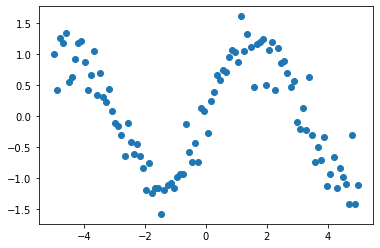

In [27]:
x = np.linspace(-5,5,100).reshape(-1,1)
y = np.sin(x) + np.random.normal(0,0.3,100).reshape(-1,1)
plt.scatter(x, y);

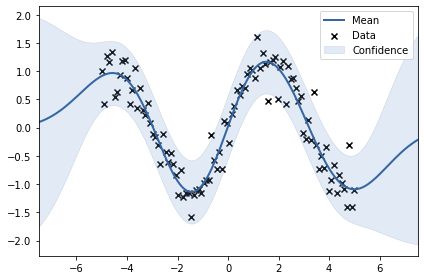

In [28]:
model = GPy.models.GPRegression(x, y, GPy.kern.RBF(x.shape[1], ARD=True))
model.optimize_restarts(5, robust=True, verbose=False)
model.plot();

In [29]:
tst = np.linspace(-7,7,200).reshape(-1,1)
prior = Measure()                  # Construct a prior.
f1 = GP(EQ(), measure=prior)        # Define our probabilistic model.
f2 = GP(Delta(), measure=prior)
f = f1+f2
post = prior | (f(x), y )           # Compute the posterior distribution.
a,b,c = post(f)(tst).marginal_credible_bounds()

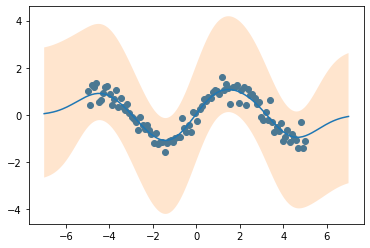

In [30]:
plt.scatter(x, y);
plt.plot(tst, a);
plt.fill_between(tst.ravel(), a+b, a+c, alpha=0.2);